In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import font_manager, rc

In [2]:
Cheonan_df = pd.read_csv('./천안시 행정동 기준 유동인구_20년 12월.CSV') #데이터 로드

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (5,437 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120831 files and dire

In [4]:
import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하

TypeError: ignored

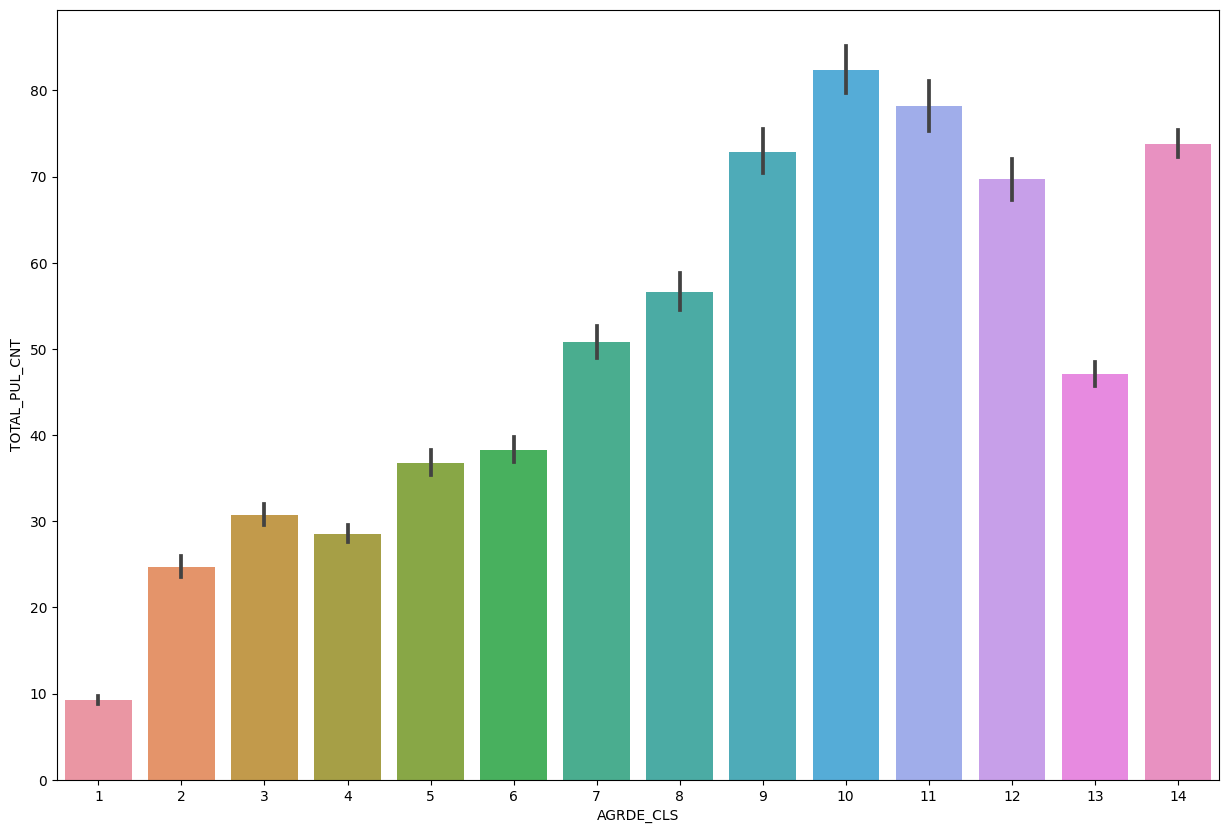

In [7]:
# sns 설정 (생략 가능)
#sns.set(style="whitegrid")

# 데이터프레임을 ADNG_NM로 그룹화하여 각 지역별 데이터 추출
grouped_data = Cheonan_df.groupby("ADNG_NM")

# 그래프 생성
plt.figure(figsize=(15, 10))  # 그래프 크기 조절 (선택 사항)

# 각 지역별로 그래프 생성
for adng_nm, data in grouped_data:
    # REVISN_NMBLT_PUL_CNT와 REVISN_AMBLT_PUL_CNT 합산한 새로운 칼럼 생성
    data["TOTAL_PUL_CNT"] = data["REVISN_NMBLT_PUL_CNT"] + data["REVISN_AMBLT_PUL_CNT"]

    # Barplot 생성
    ax = sns.barplot(x="AGRDE_CLS", y="TOTAL_PUL_CNT", data=data)

    # 막대 위에 정확한 수치 표시
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(format(height, ".0f"),  # 정수 형태로 표기
                    (p.get_x() + p.get_width() / 2., height),
                    ha="center", va="bottom",  # 수치를 막대 위에 위치
                    fontsize=8, color="black", xytext=(0, 5),
                    textcoords="offset points")

    # 각 지역별 그래프 제목 설정
    plt.title(f"{adng_nm}의 유동인구에 대한 나이 분류")

    # x, y 레이블 설정
    plt.xlabel("나이 별 구분")  # x 레이블 설정
    plt.ylabel("총 유동인구 수")  # y 레이블 설정

    # 그래프 표시
    plt.show()